In [1]:
!wget https://raw.githubusercontent.com/niazwazir/TESTING_IMAGES/main/BUTTERFLY.png

--2022-01-23 11:16:39--  https://raw.githubusercontent.com/niazwazir/TESTING_IMAGES/main/BUTTERFLY.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 127529 (125K) [image/png]
Saving to: ‘BUTTERFLY.png’

BUTTERFLY.png       100%[===================>] 124.54K  --.-KB/s    in 0.003s  

2022-01-23 11:16:39 (36.3 MB/s) - ‘BUTTERFLY.png’ saved [127529/127529]



In [2]:
from keras.layers import Convolution2D, MaxPooling2D, Activation, Conv2DTranspose
from keras.models import Sequential
from numpy import asarray
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [3]:
!ls

BUTTERFLY.png  sample_data


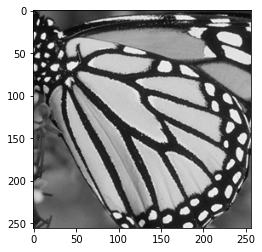

In [4]:
img = cv2.imread('BUTTERFLY.png',cv2.IMREAD_GRAYSCALE)
img = img
plt.imshow(img,cmap='gray')
plt.show()

In [5]:
img.shape

(256, 256)

In [6]:
img_batch=img.reshape(1,img.shape[0],img.shape[1],1)
img_batch.shape

(1, 256, 256, 1)

In [7]:
from tensorflow import keras

In [8]:
model = Sequential()
model.add(Convolution2D(1,(5,15),padding='same',input_shape=img_batch.shape[1:]))
model.add(MaxPooling2D(pool_size=(2,2)))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 1)       76        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 1)      0         
 )                                                               
                                                                 
Total params: 76
Trainable params: 76
Non-trainable params: 0
_________________________________________________________________


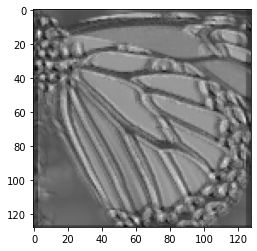

In [9]:
conv_img = model.predict(img_batch)
conv_img_show = conv_img.reshape(conv_img.shape[1],conv_img.shape[2])
plt.imshow(conv_img_show, cmap='gray')
plt.show()

In [10]:
conv_img_show.shape

(128, 128)

In [11]:
modelA = Sequential()
modelA.add(Convolution2D(1,(3,3),padding='same',input_shape=img_batch.shape[1:]))
modelA.add(MaxPooling2D(pool_size=(2,2)))
modelA.add(Conv2DTranspose(1,(1,1),strides=(2,2)))
modelA.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 256, 256, 1)       10        
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 128, 128, 1)      0         
 2D)                                                             
                                                                 
 conv2d_transpose (Conv2DTra  (None, 256, 256, 1)      2         
 nspose)                                                         
                                                                 
Total params: 12
Trainable params: 12
Non-trainable params: 0
_________________________________________________________________


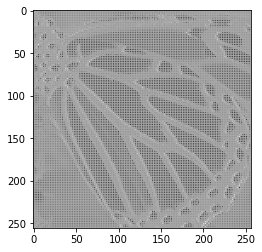

In [12]:
conv_img = modelA.predict(img_batch)
conv_img_show = conv_img.reshape(conv_img.shape[1],conv_img.shape[2])
plt.imshow(conv_img_show, cmap='gray')
plt.show()

In [13]:
conv_img_show.shape

(256, 256)

In [14]:
from keras.layers import Input
from keras.layers import Conv2DTranspose
from keras.layers import Conv2D
from keras.models import Model

In [15]:
img_shape = (32,32,1)
input_img = Input(shape=(img_shape))
MP1 = MaxPooling2D(pool_size=(2,2))(input_img)
TC1 = Conv2DTranspose(1, (3, 3), strides=(2,2), padding='same')(MP1)
C1 = Conv2D(1,(1,1),padding='SAME',strides=(2,2))(TC1)
TC2 = Conv2DTranspose(1, (3, 3), strides=(2,2), padding='same')(C1)
model = Model(input_img, TC2)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 1)]       0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 1)        0         
 2D)                                                             
                                                                 
 conv2d_transpose_1 (Conv2DT  (None, 32, 32, 1)        10        
 ranspose)                                                       
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 1)         2         
                                                                 
 conv2d_transpose_2 (Conv2DT  (None, 32, 32, 1)        10        
 ranspose)                                                       
                                                             